In [1]:
import threading
import time
import dns.message
import dns.query
import sys
import dns.resolver

domain_list = ["Google.com","Youtube.com","Tmall.com","Baidu.com","Qq.com","Facebook.com","Sohu.com","Taobao.com","360.cn","Yahoo.com","Jd.com","Amazon.com","Wikipedia.org","Sina.com.cn","Weibo.com","Zoom.us","Live.com","Reddit.com","Netflix.com","Xinhuanet.com","Microsoft.com","Okezone.com","Vk.com","Office.com","Instagram.com",]
root_list = ["198.41.0.4","199.9.14.201","192.33.4.12","199.7.91.13","192.203.230.10","192.5.5.241","192.112.36.4","198.97.190.53","192.36.148.17","192.58.128.30","193.0.14.129","199.7.83.42","202.12.27.33"]

In [2]:
class My_Thread():
    def __init__(self, domain_name, resolve_type, server_list):
        self.response = None
        self.domain_name = domain_name
        self.resolve_type = resolve_type
        self.server_list = server_list

    def dns_resolve(self, dns_server):
        try:
            dns_query = dns.message.make_query(self.domain_name, self.resolve_type)
            get_response = dns.query.udp(dns_query, dns_server, 53)
            self.response = get_response
        except:
            pass
    
    def process_response(self):
        result_answer = self.response.answer
        result_authority = self.response.authority
        result_additional = self.response.additional
        if result_answer != []:
            if len(result_answer) == 1 and result_answer[0].to_text().split()[3] == "CNAME":
                return My_Thread(result_answer[0].to_text().split()[4], self.resolve_type, self.server_list).main()
            else:
                return result_answer, len(self.response.to_wire())
        else:
            if result_additional == []:
                if result_authority == []:
                    return []
                ns_list = []
                authority_text = result_authority[0].to_text().split()
                item_no = 4
                while item_no<len(authority_text):
                    ns_list.append(authority_text[item_no])
                    item_no = item_no + 5
                self.response = None
                item_no = 0
                while item_no>-1:
                    if self.response != None:
                        return self.process_response()
                    item_answer,_ = My_Thread(ns_list[item_no], "A", root_list).main()
                    ns_ip = item_answer[0].to_text().split()[4]
                    t = threading.Thread(target=self.dns_resolve, args=(ns_ip,))
                    t.daemon = True
                    t.start()                            
            next_server_list = []
            for item in result_additional:
                next_server_list.append(item.to_text().split()[4])
            return My_Thread(self.domain_name, self.resolve_type, next_server_list).main()

    def main(self):
        for root_i in self.server_list:
            t = threading.Thread(target=self.dns_resolve, args=(root_i,))
            t.daemon = True
            t.start()
        while 1:
            if self.response != None:
                return self.process_response()
                

In [3]:
result_0, result_1 = My_Thread("amazon.com","A",root_list).main()
for i in result_0:
    print(i.to_text())
print(result_1)

amazon.com. 1 IN A 176.32.103.205
amazon.com. 1 IN A 176.32.98.166
amazon.com. 1 IN A 205.251.242.103
504


In [19]:
time_cost_mydig = [0]*25

for i in range(10):
    for j in range(25):
        time_start = time.time()
        result_0, result_1 = My_Thread(domain_list[j], "A", root_list).main()
        for k in result_0:
            print(k.to_text())
        time_end = time.time()
        time_cost = (time_end-time_start)*100
        time_cost_mydig[j] = time_cost_mydig[j] + time_cost

Google.com. 219 IN A 172.217.27.142
Youtube.com. 16 IN A 31.13.84.2
Tmall.com. 1 IN A 140.205.94.193
Tmall.com. 1 IN A 140.205.130.99
Baidu.com. 115 IN A 220.181.38.148
Baidu.com. 115 IN A 39.156.69.79
Qq.com. 446 IN A 125.39.52.26
Qq.com. 446 IN A 58.250.137.36
Qq.com. 446 IN A 58.247.214.47
Facebook.com. 82 IN A 31.13.75.18
Sohu.com. 462 IN A 211.159.191.18
Taobao.com. 219 IN A 140.205.220.96
Taobao.com. 219 IN A 140.205.94.189
360.cn. 285 IN A 111.206.61.131
360.cn. 285 IN A 123.6.48.25
Yahoo.com. 1322 IN A 74.6.231.20
Yahoo.com. 1322 IN A 74.6.143.25
Yahoo.com. 1322 IN A 74.6.231.21
Yahoo.com. 1322 IN A 98.137.11.164
Yahoo.com. 1322 IN A 74.6.143.26
Yahoo.com. 1322 IN A 98.137.11.163
Jd.com. 11 IN A 120.52.148.118
Jd.com. 11 IN A 118.193.98.63
Jd.com. 11 IN A 111.13.149.108
Amazon.com. 1 IN A 176.32.103.205
Amazon.com. 1 IN A 205.251.242.103
Amazon.com. 1 IN A 176.32.98.166
Wikipedia.org. 114 IN A 69.171.227.37
Sina.com.cn. 32 IN A 123.126.55.41
Weibo.com. 27 IN A 202.108.5.122
Wei

Taobao.com. 213 IN A 140.205.220.96
Taobao.com. 213 IN A 140.205.94.189
360.cn. 279 IN A 111.206.61.131
360.cn. 279 IN A 123.6.48.25
Yahoo.com. 1316 IN A 98.137.11.164
Yahoo.com. 1316 IN A 74.6.143.25
Yahoo.com. 1316 IN A 98.137.11.163
Yahoo.com. 1316 IN A 74.6.231.20
Yahoo.com. 1316 IN A 74.6.143.26
Yahoo.com. 1316 IN A 74.6.231.21
Jd.com. 5 IN A 111.13.149.108
Jd.com. 5 IN A 118.193.98.63
Jd.com. 5 IN A 120.52.148.118
Amazon.com. 0 IN A 176.32.98.166
Amazon.com. 0 IN A 205.251.242.103
Amazon.com. 0 IN A 176.32.103.205
Wikipedia.org. 108 IN A 69.171.227.37
Sina.com.cn. 26 IN A 123.126.55.41
Weibo.com. 21 IN A 202.108.5.122
Weibo.com. 21 IN A 202.108.7.124
Zoom.us. 31 IN A 52.202.62.232
Live.com. 740 IN A 204.79.197.212
Reddit.com. 123 IN A 185.45.6.103
Netflix.com. 39 IN A 54.154.81.103
Netflix.com. 39 IN A 54.194.155.146
Netflix.com. 39 IN A 34.243.154.212
Netflix.com. 39 IN A 52.211.172.255
Netflix.com. 39 IN A 52.17.27.129
Netflix.com. 39 IN A 52.214.178.75
Netflix.com. 39 IN A 52.

Jd.com. 119 IN A 120.52.148.118
Jd.com. 119 IN A 118.193.98.63
Jd.com. 119 IN A 111.13.149.108
Amazon.com. 1 IN A 205.251.242.103
Amazon.com. 1 IN A 176.32.98.166
Amazon.com. 1 IN A 176.32.103.205
Wikipedia.org. 100 IN A 69.171.227.37
Sina.com.cn. 18 IN A 123.126.55.41
Weibo.com. 13 IN A 202.108.7.124
Weibo.com. 13 IN A 202.108.5.122
Zoom.us. 23 IN A 52.202.62.232
Live.com. 732 IN A 204.79.197.212
Reddit.com. 115 IN A 185.45.6.103
Netflix.com. 32 IN A 54.194.155.146
Netflix.com. 32 IN A 52.31.182.100
Netflix.com. 32 IN A 52.18.82.167
Netflix.com. 32 IN A 54.154.81.103
Netflix.com. 32 IN A 52.17.27.129
Netflix.com. 32 IN A 52.211.172.255
Netflix.com. 32 IN A 34.243.154.212
Netflix.com. 32 IN A 52.214.178.75
Xinhuanet.com. 1000 IN A 202.108.119.193
Xinhuanet.com. 1000 IN A 202.108.119.194
Microsoft.com. 1269 IN A 104.215.148.63
Microsoft.com. 1269 IN A 40.113.200.201
Microsoft.com. 1269 IN A 40.112.72.205
Microsoft.com. 1269 IN A 40.76.4.15
Microsoft.com. 1269 IN A 13.77.161.179
Okezone.

In [18]:
time_cost_8888 = [0]*25

for i in range(10):
    for j in range(25):
        print(domain_list[j])
        time_start = time.time()
        dns_query = dns.message.make_query(domain_list[j], "A")
        get_response = dns.query.udp(dns_query, "8.8.8.8", 53)
        time_end = time.time()
        time_cost = (time_end-time_start)*100
        time_cost_8888[j] = time_cost_8888[j] + time_cost

Google.com
Youtube.com
Tmall.com
Baidu.com
Qq.com
Facebook.com
Sohu.com
Taobao.com
360.cn
Yahoo.com
Jd.com
Amazon.com
Wikipedia.org
Sina.com.cn
Weibo.com
Zoom.us
Live.com
Reddit.com
Netflix.com
Xinhuanet.com
Microsoft.com
Okezone.com
Vk.com
Office.com
Instagram.com
Google.com
Youtube.com
Tmall.com
Baidu.com
Qq.com
Facebook.com
Sohu.com
Taobao.com
360.cn
Yahoo.com
Jd.com
Amazon.com
Wikipedia.org
Sina.com.cn
Weibo.com
Zoom.us
Live.com
Reddit.com
Netflix.com
Xinhuanet.com
Microsoft.com
Okezone.com
Vk.com
Office.com
Instagram.com
Google.com
Youtube.com
Tmall.com
Baidu.com
Qq.com
Facebook.com
Sohu.com
Taobao.com
360.cn
Yahoo.com
Jd.com
Amazon.com
Wikipedia.org
Sina.com.cn
Weibo.com
Zoom.us
Live.com
Reddit.com
Netflix.com
Xinhuanet.com
Microsoft.com
Okezone.com
Vk.com
Office.com
Instagram.com
Google.com
Youtube.com
Tmall.com
Baidu.com
Qq.com
Facebook.com
Sohu.com
Taobao.com
360.cn
Yahoo.com
Jd.com
Amazon.com
Wikipedia.org
Sina.com.cn
Weibo.com
Zoom.us
Live.com
Reddit.com
Netflix.com
Xinhuane

In [14]:
time_cost_local = [0]*25

for i in range(10):
    for j in range(25):
        print(domain_list[j])
        time_start = time.time()
        dns_query = dns.message.make_query(domain_list[j], "A")
        get_response = dns.query.udp(dns_query, "114.114.114.114", 53)
        time_end = time.time()
        time_cost = (time_end-time_start)*100
        time_cost_local[j] = time_cost_local[j] + time_cost

Google.com
Youtube.com
Tmall.com
Baidu.com
Qq.com
Facebook.com
Sohu.com
Taobao.com
360.cn
Yahoo.com
Jd.com
Amazon.com
Wikipedia.org
Sina.com.cn
Weibo.com
Zoom.us
Live.com
Reddit.com
Netflix.com
Xinhuanet.com
Microsoft.com
Okezone.com
Vk.com
Office.com
Instagram.com
Google.com
Youtube.com
Tmall.com
Baidu.com
Qq.com
Facebook.com
Sohu.com
Taobao.com
360.cn
Yahoo.com
Jd.com
Amazon.com
Wikipedia.org
Sina.com.cn
Weibo.com
Zoom.us
Live.com
Reddit.com
Netflix.com
Xinhuanet.com
Microsoft.com
Okezone.com
Vk.com
Office.com
Instagram.com
Google.com
Youtube.com
Tmall.com
Baidu.com
Qq.com
Facebook.com
Sohu.com
Taobao.com
360.cn
Yahoo.com
Jd.com
Amazon.com
Wikipedia.org
Sina.com.cn
Weibo.com
Zoom.us
Live.com
Reddit.com
Netflix.com
Xinhuanet.com
Microsoft.com
Okezone.com
Vk.com
Office.com
Instagram.com
Google.com
Youtube.com
Tmall.com
Baidu.com
Qq.com
Facebook.com
Sohu.com
Taobao.com
360.cn
Yahoo.com
Jd.com
Amazon.com
Wikipedia.org
Sina.com.cn
Weibo.com
Zoom.us
Live.com
Reddit.com
Netflix.com
Xinhuane

In [20]:
print(time_cost_8888)
print(time_cost_mydig)
print(time_cost_local)

[22.688937187194824, 20.42367458343506, 21.433043479919434, 17.75648593902588, 19.629859924316406, 21.862101554870605, 17.93801784515381, 20.700788497924805, 22.403287887573242, 22.027993202209473, 17.413926124572754, 22.838950157165527, 18.52242946624756, 22.64246940612793, 19.42310333251953, 23.89833927154541, 21.737241744995117, 24.321818351745605, 22.254252433776855, 21.917200088500977, 20.85137367248535, 25.213146209716797, 20.76127529144287, 22.741031646728516, 24.10151958465576]
[68.01958084106445, 58.75141620635986, 62.36116886138916, 77.38533020019531, 46.230125427246094, 52.94828414916992, 53.87847423553467, 56.71091079711914, 78.47766876220703, 66.57745838165283, 60.36269664764404, 69.8742151260376, 53.46078872680664, 61.37714385986328, 50.02140998840332, 74.45127964019775, 71.25775814056396, 86.76464557647705, 87.75508403778076, 69.46771144866943, 74.65271949768066, 74.4936466217041, 94.36440467834473, 87.24489212036133, 67.15188026428223]
[20.22726535797119, 20.87700366973

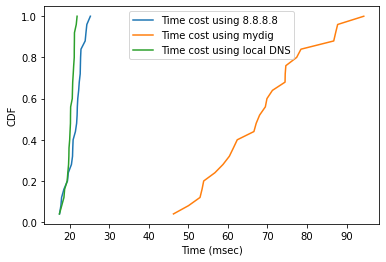

In [24]:
import matplotlib.pyplot as plt

time_cost_8888.sort()
time_cost_mydig.sort()
time_cost_local.sort()

plot_data = [[],[]]
for i in range(25):
    plot_data[0].append(time_cost_8888[i])
    plot_data[1].append((i+1)/25)
plt.plot(plot_data[0],plot_data[1],label = "Time cost using 8.8.8.8")

plot_data = [[],[]]
for i in range(25):
    plot_data[0].append(time_cost_mydig[i])
    plot_data[1].append((i+1)/25)
plt.plot(plot_data[0],plot_data[1],label = "Time cost using mydig")

plot_data = [[],[]]
for i in range(25):
    plot_data[0].append(time_cost_local[i])
    plot_data[1].append((i+1)/25)
plt.plot(plot_data[0],plot_data[1],label = "Time cost using local DNS")

plt.xlabel("Time (msec)")
plt.ylabel("CDF")
plt.legend()
plt.savefig('test_C.pdf')
plt.show()